In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cars_sales_ohe.csv")

In [3]:
df.head()

,Audi,BMW,Ford,Hyundi,Mercedes-Benz,Skoda,Toyota,Vauxhall,Volkswagen,1 Series,...,Manual,Semi-Auto,year,Diesel,Electric,Hybrid,Petrol,engineSize,mileage,price
0,0,0,0,0,0,0,1,0,0,0,...,1,0,2016,0,0,0,1,2.0,24089,16000
1,0,0,0,0,0,0,1,0,0,0,...,1,0,2017,0,0,0,1,2.0,18615,15995
2,0,0,0,0,0,0,1,0,0,0,...,1,0,2015,0,0,0,1,2.0,27469,13998
3,0,0,0,0,0,0,1,0,0,0,...,1,0,2017,0,0,0,1,2.0,14736,18998
4,0,0,0,0,0,0,1,0,0,0,...,1,0,2017,0,0,0,1,2.0,36284,17498


In [4]:
x = df.drop(columns=['price'])
y = df.price

In [5]:
x.head()

,Audi,BMW,Ford,Hyundi,Mercedes-Benz,Skoda,Toyota,Vauxhall,Volkswagen,1 Series,...,Automatic,Manual,Semi-Auto,year,Diesel,Electric,Hybrid,Petrol,engineSize,mileage
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,2016,0,0,0,1,2.0,24089
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,2017,0,0,0,1,2.0,18615
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,2015,0,0,0,1,2.0,27469
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,2017,0,0,0,1,2.0,14736
4,0,0,0,0,0,0,1,0,0,0,...,0,1,0,2017,0,0,0,1,2.0,36284


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [7]:
x_train,y_train=np.asarray(x_train),np.asarray(y_train)
x_test,y_test=np.asarray(x_test),np.asarray(y_test)

In [8]:
x_train.shape,x_test.shape

((69185, 175), (17297, 175))

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


In [10]:
params = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

In [11]:
model = GradientBoostingRegressor(
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=2,
    loss='huber',
    random_state=42
)


In [12]:
gbr = GridSearchCV(model, params, cv=3,
                   n_jobs=-1)

In [13]:
gbr.fit(x_train, y_train) 

GridSearchCV(cv=3,
             estimator=GradientBoostingRegressor(loss='huber',
                                                 max_features='sqrt',
                                                 min_samples_leaf=3,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000]})

In [29]:
gbr.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000}

In [30]:
def MSE(model):
    
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    
    mse_train = mean_squared_error(y_train,pred_train)
    mse_test = mean_squared_error(y_test,pred_test)
    
    return mse_train,mse_test

In [31]:
best_model=gbr.best_estimator_

In [34]:
mse_train,mse_test=MSE(best_model)

In [35]:
print(f" Train MSE: {mse_train}")
print(f" Test MSE:  {mse_test}")

 Train MSE: 2975974.8083753795
 Test MSE:  3512988.567158761


In [39]:
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
gb = GradientBoostingRegressor(
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=2,
    loss='huber',
    random_state=42,
    learning_rate=0.1, 
    max_depth=7,
    n_estimators=1000
)

In [44]:
gb.fit(x_train,y_train)

GradientBoostingRegressor(loss='huber', max_depth=7, max_features='sqrt',
                          min_samples_leaf=3, n_estimators=1000,
                          random_state=42)

## Evaluation

In [45]:
mse_train,mse_test = MSE(gb)

In [46]:
print(f"MSE Train: {mse_train}")
print(f"MSE Test:  {mse_test}")

MSE Train: 2975974.8083753795
MSE Test:  3512988.567158761


In [48]:
print(f"R*2 Train: {gb.score(x_train,y_train)}")
print(f"R*2 Test:  {gb.score(x_test,y_test)}")

R*2 Train: 0.9613495742321768
R*2 Test:  0.9545502559453148


In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
cv = cross_val_score(gb,x_test,y_test,cv = 10,n_jobs = -1)

In [51]:
cv

array([0.94255752, 0.94712691, 0.93129077, 0.95212585, 0.9194396 ,
       0.95018305, 0.93770162, 0.92599963, 0.9488023 , 0.94154619])

In [52]:
cv.mean()

0.9396773449077858

In [53]:
sns.set_style(style = "whitegrid")

In [62]:
pred = gb.predict(x_test)

In [65]:
def main():
    
    fig = plt.subplots(1,1,figsize = (20,8))
    plt.scatter(y_test,pred,marker = "+",c= "#adff2f",alpha = 0.4,label = "Predictions")
    plt.plot(y_test,y_test,c = "#4000ff",lw = 5,label = "True Values")
    plt.legend()

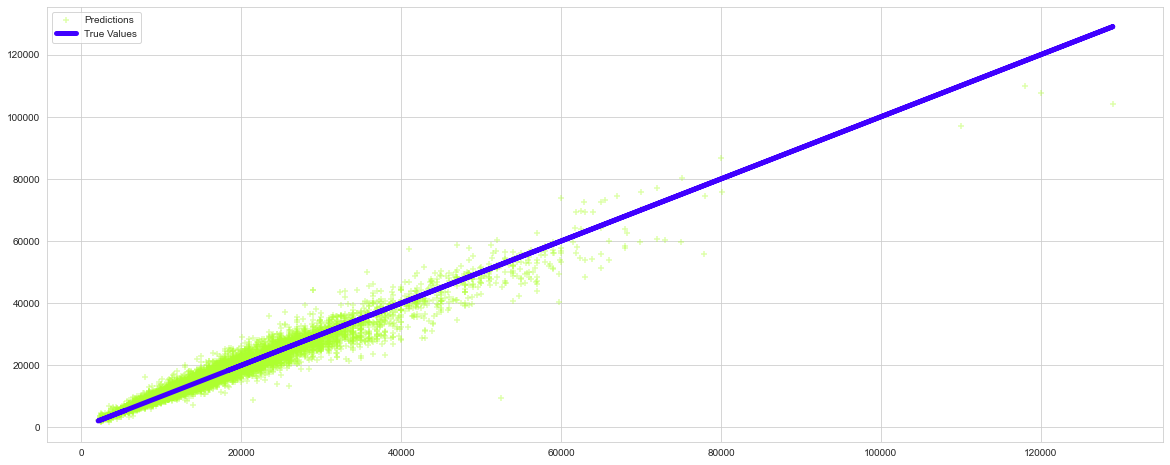

In [66]:
_ = main()

In [68]:
df_predictions = pd.DataFrame({'True Values':y_test,"Predictions":pred})

In [69]:
df_predictions.sample(n = 10,random_state = 50)

,True Values,Predictions
16104,30491,26963.422101
4453,16481,18388.580439
7060,6998,7040.907354
10216,15900,14738.316354
603,10940,10078.165501
486,7990,6915.121248
2185,12000,11700.553300
16000,8290,8259.482190
15545,10000,10040.436486
4635,29099,27302.601031


In [71]:
columns = x.columns

In [72]:
for index,column in enumerate(columns):
   if column == 'year' or column == 'engineSize' or column == 'mileage':
    print(index,column)

168 year
173 engineSize
174 mileage


In [75]:
def predict(manufacturer,model,transmission,year,fuel_type,engineSize,mileage):
    
    data = np.zeros(len(columns))
    
    manufacturer_idx = np.where(columns == manufacturer)[0][0]
    model_idx = np.where(columns == model)[0][0]
    transmission_idx = np.where(columns == transmission)[0][0]
    fuel_type_idx = np.where(columns == fuel_type)[0][0]
    
    data[165] = year
    data[170] = engineSize
    data[171] = mileage

    
    if manufacturer_idx >=0:
        data[manufacturer_idx] = 1

    if model_idx >=0:
        data[model_idx] = 1
        
    if transmission_idx >=0:
        data[transmission_idx] = 1
        
    if fuel_type_idx >=0:
        data[fuel_type_idx] = 1
        
    data = np.asarray([data])
    pred = gb.predict(data)
    
    return np.round(pred,2)

In [76]:
predict('Ford','Mustang','Automatic',2020,'Petrol',5.0,3500)

array([14709.38])

In [77]:
predict('Toyota','Corolla','Automatic',2019,'Hybrid',2.0,18200)

array([11864.73])

In [78]:
predict('Volkswagen','Jetta','Automatic',2012,'Petrol',2.0,45000)

array([9105.64])

In [79]:
predict('Audi','R8','Semi-Auto',2020,'Diesel',5.2,4200)

array([32725.26])

In [80]:
predict('Ford','Fiesta','Automatic',2017,'Petrol',1.0,15944)

array([7089.15])

In [81]:
predict('BMW','3 Series','Manual',2017,'Diesel',2.0,91000)

array([13268.87])

In [82]:
predict('Hyundi','Santa Fe','Automatic',2014,'Diesel',2.2,45000)

array([12411.7])

In [83]:
predict('Mercedes-Benz','C Class','Automatic',2019,'Petrol',1.5,15000)

array([14467.29])

In [84]:
predict('Skoda','Octavia','Manual',2017,'Petrol',1.4,32000)

array([8801.94])

In [85]:
predict('BMW','3 Series','Manual',2017,'Diesel',2.0,91000)

array([13268.87])

In [86]:
predict('Vauxhall','Corsa','Manual',2018,'Petrol',1.4,17000)

array([5968.51])